# autoGluon
- Sara Echeverría 21371
- Ricardo Mendez 21289

Repository link: https://github.com/bl33h/autoGluon

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

In [2]:
# load the dataset from the csv file
def loadData(fileName):
    data = pd.read_csv(fileName)
    # split the data into training and test sets
    trainData, testData = train_test_split(data, test_size=0.2, random_state=42)  # 80% training, 20% testing
    return trainData, testData

In [3]:
# obtain basic descriptive statistics and visualize distributions
def exploreData(data):
    # print basic descriptive statistics
    print(data.describe())
    
    # visualize the distribution of each variable
    for column in data.columns:
        plt.figure(figsize=(10, 4))
        sns.histplot(data[column], kde=True, bins=30)
        plt.title('Distribution of ' + column)
        plt.show()

# check for missing values and handle them
def handleMissingValues(data):
    # check for missing values
    print("missing values before handling:", data.isnull().sum())
    
    # fill missing values with the median of each column as an example
    data.fillna(data.median(), inplace=True)
    
    # print missing values after handling to confirm no missing data
    print("missing values after handling:", data.isnull().sum())
    return data

In [4]:
# train models with autogluon
def trainModels(data):
    label = 'Outcome'  # specify the target variable
    savePath = './models'  # specify where to save the trained models
    
    predictor = TabularPredictor(label=label, path=savePath, eval_metric='accuracy').fit(
        data,
        presets='best_quality'
    )
    return predictor

In [5]:
def evaluateModel(predictor, testData):
    # display leaderboard sorted by accuracy
    leaderboard = predictor.leaderboard(silent=True)
    display(leaderboard)

    # find the best model from the leaderboard
    bestModel = leaderboard['model'][0]
    
    yTrue = testData['Outcome']
    testDataNoLabel = testData.drop(labels=['Outcome'], axis=1)
    
    # predict using the best model
    yPred = predictor.predict(testDataNoLabel, model=bestModel)
    
    # generate confusion matrix
    cm = confusion_matrix(yTrue, yPred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=predictor.class_labels, yticklabels=predictor.class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Best Model')
    plt.show()

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   614.000000  614.000000     614.000000     614.000000  614.000000   
mean      3.742671  120.855049      69.415309      20.399023   81.438111   
std       3.313264   32.035057      18.512599      15.433974  116.234835   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000  100.000000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   42.500000   
75%       6.000000  139.000000      80.000000      32.000000  129.750000   
max      17.000000  199.000000     122.000000      63.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  614.000000                614.000000  614.000000  614.000000  
mean    31.983388                  0.469168   32.907166    0.346906  
std      7.740625                  0.336847   11.503437    0.476373  
min      0.000000                  

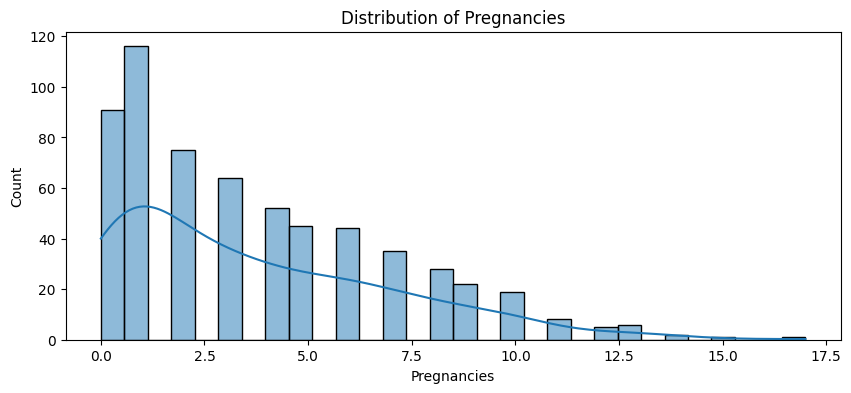

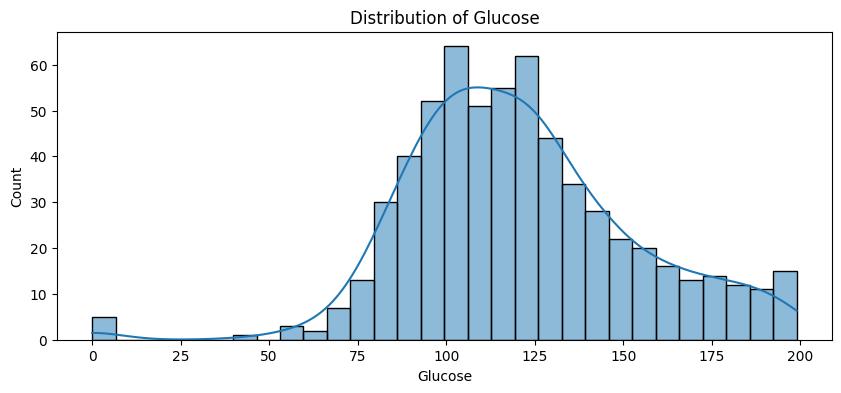

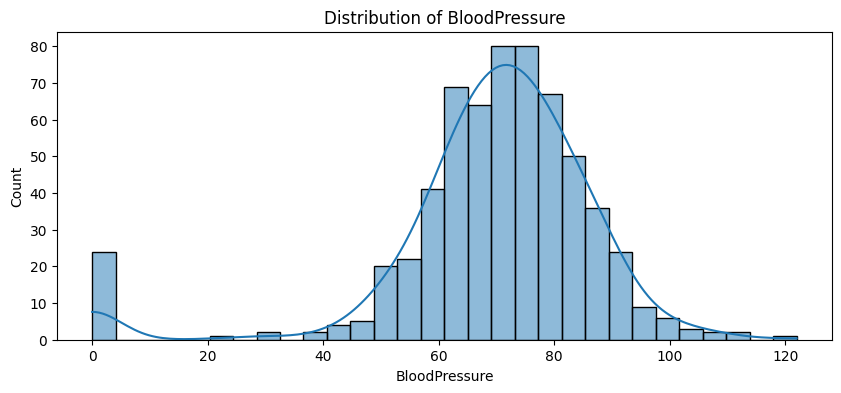

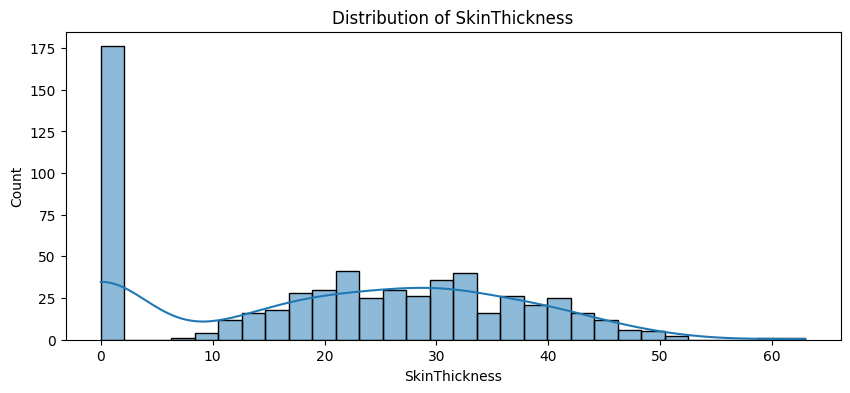

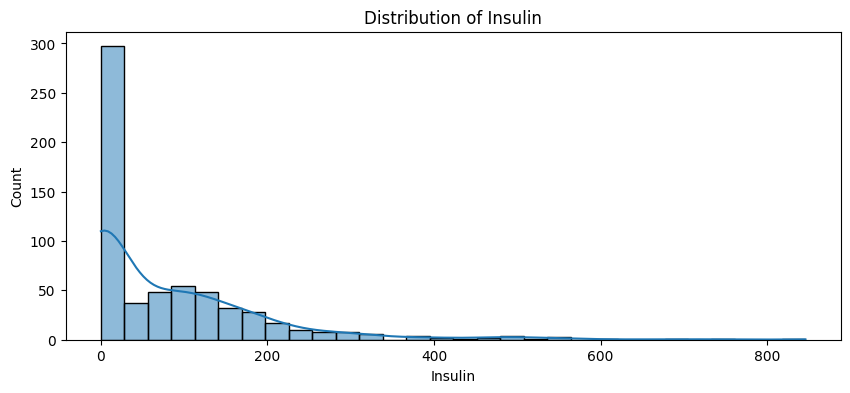

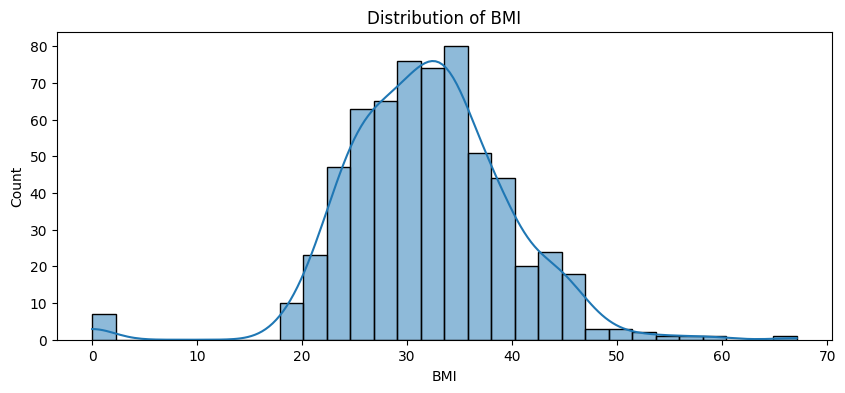

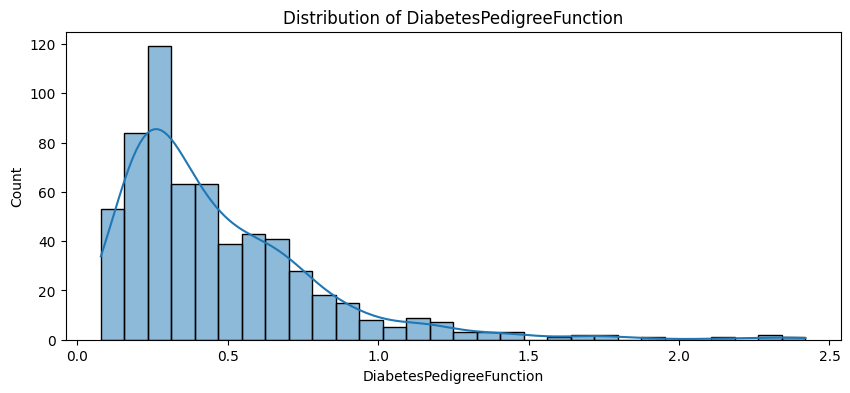

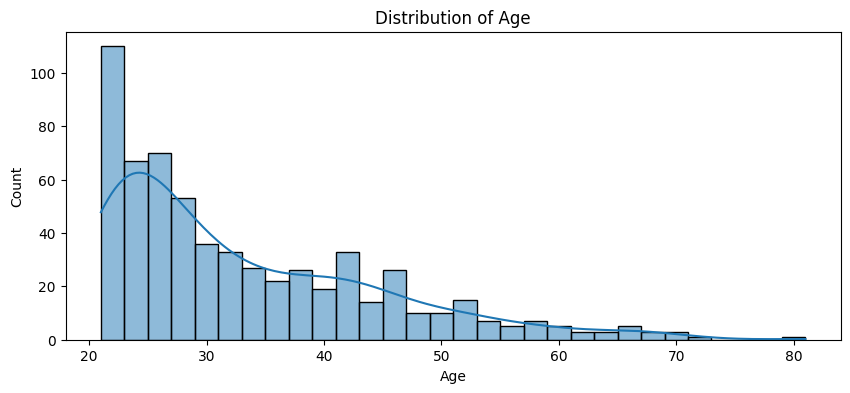

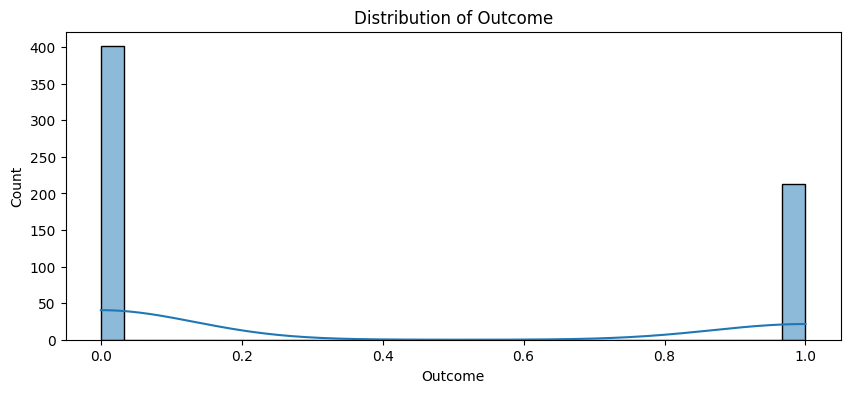

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.9.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
Memory Avail:       7.41 GB / 15.69 GB (47.2%)
Disk Space Avail:   146.82 GB / 475.45 GB (30.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stacked overfitting.
	Running DyStack for up t

missing values before handling: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
missing values after handling: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


	Running DyStack sub-fit in a ray process to avoid memory leakage. Enabling ray logging (enable_ray_logging=True). Specify `ds_args={'enable_ray_logging': False}` if you experience logging issues.
C:\Users\sarap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\autogluon\tabular\predictor\predictor.py:1242: UserWarning: Failed to use ray for memory safe fits. Falling back to normal fit. Error: OSError(0, 'AssignProcessToJobObject() failed')
  stacked_overfitting = self._sub_fit_memory_save_wrapper(
		Context path: "./models\ds_sub_fit\sub_fit_ho"
Running DyStack sub-fit ...
Beginning AutoGluon training ... Time limit = 898s
AutoGluon will save models to "./models\ds_sub_fit\sub_fit_ho"
Train Data Rows:    545
Train Data Columns: 8
Label Column:       Outcome
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data 

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.786645,accuracy,0.283975,3.234768,0.000000,0.194207,3,True,40
1,WeightedEnsemble_L2,0.786645,accuracy,0.284976,3.172729,0.001001,0.132168,2,True,21
2,ExtraTrees_r178_BAG_L1,0.771987,accuracy,0.086799,1.104923,0.086799,1.104923,1,True,15
3,ExtraTreesEntr_BAG_L1,0.771987,accuracy,0.100989,0.866062,0.100989,0.866062,1,True,6
4,ExtraTrees_r42_BAG_L1,0.770358,accuracy,0.085253,0.730726,0.085253,0.730726,1,True,7
5,ExtraTrees_r197_BAG_L1,0.770358,accuracy,0.087951,1.410482,0.087951,1.410482,1,True,18
6,ExtraTrees_r49_BAG_L1,0.770358,accuracy,0.096187,1.069576,0.096187,1.069576,1,True,11
7,ExtraTreesGini_BAG_L1,0.770358,accuracy,0.102892,0.775441,0.102892,0.775441,1,True,5
8,ExtraTrees_r126_BAG_L1,0.770358,accuracy,0.104701,0.844791,0.104701,0.844791,1,True,20
9,RandomForest_r166_BAG_L1,0.768730,accuracy,0.089250,1.468449,0.089250,1.468449,1,True,16


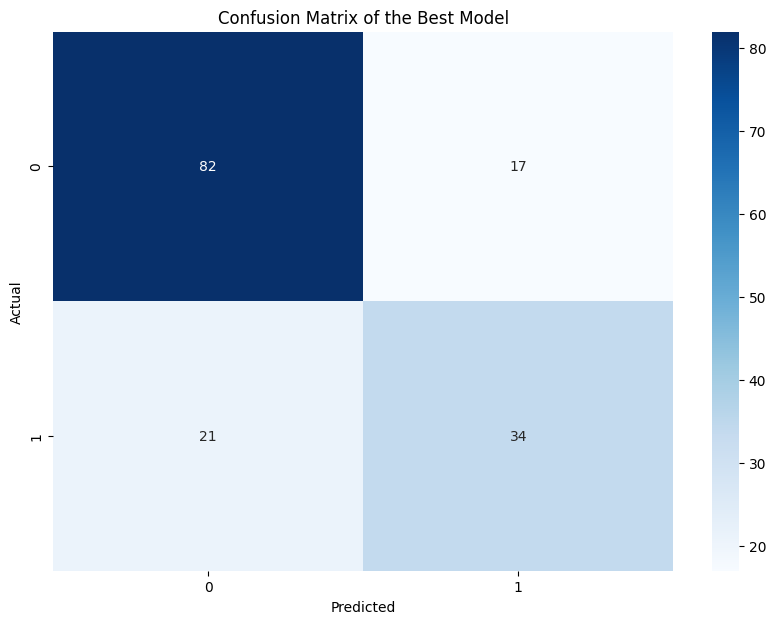

In [6]:
# main function to run the processes
def main():
    # load data
    trainData, testData = loadData('data/diabetes.csv')
    
    # perform exploratory data analysis
    exploreData(trainData)
    
    # handle missing values
    trainData = handleMissingValues(trainData)
    
    # train models and obtain a predictor
    predictor = trainModels(trainData)
    
    return predictor, testData  # return both predictor and test data

if __name__ == '__main__':
    predictor, testData = main()  # obtain the predictor and test data after training
    evaluateModel(predictor, testData)  # now pass these to the evaluation function

# Reflexión
La matriz de confusión muestra un rendimiento general aceptable del modelo de AutoGluon, con una preocupante cantidad de falsos negativos que podrían tener implicaciones graves en contextos críticos como la medicina. Este enfoque automatizado, aunque eficiente y accesible, puede sacrificar el control detallado y la comprensión profunda del proceso, aspectos esenciales en aplicaciones donde los errores de predicción son inaceptables.

Las herramientas de AutoML, como AutoGluon, facilitan el desarrollo de modelos de aprendizaje automático, pero requieren una supervisión cuidadosa y una evaluación crítica para garantizar que los resultados sean fiables y aplicables éticamente en situaciones del mundo real.